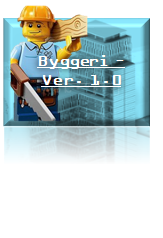

alt.Chart(...)

**1. Forretningsforståelse**

```
“Det første er at forstå det forretningsmæssige perspektiv grundigt. 
- Hvad ønsker kunden at opnå?
Indsaml information om forretningssituationen for organisationen. 
Dette lettere identificering af forretningsmål, men identificerer dertil resourcer, 
så som data, viden, personale og hardware resourcer, som senere kan anvendes.
Kunden har mange konkurrerende mål og begrænsninger, der skal være korrekt afstemt. 
Analytikerens mål er at afdække vigtige faktorer i starten af ​​projektet, som kan påvirke det endelige resultat. 
Forsømmelse af dette trin kan resulterer i tid anvendt på at svare rigtigt på de forkerte spørgsmål”

```
<p align = "right"> CRISP-DM 1.0</p>


**Analyse - Ekstern Strategi**


Når vi positionerer os i forhold til det eksterne markedet, må vi forstå konkurrende ydelser i industrien. 
En stigende grad af digitalisering af forretningsdriften kan sikre konkurrencedygtighed:

*   Konkurrence faktorer - 	Estimere kritiskhed af organisatoriske processer (f.eks. David G. McKendrick: From Silicon Vally to Singapore)
*   Platform design - 	Estimere netværks værdi (f.eks. The winner takes it all, )
*   Timing - 	Estimere værdi af først-med-initiative (f.eks. Flash Boys: A Wall Street Revolt)
*   Genskriv reglerne - 	Estimere værdi af markedets konvergence
*   Kontekst overførsel - 	Estimere værdi af krydssalg og synergier




**Mulighedsrum for drifttiltag**

Hvilken fase ønsker jeg at forbedre?

*   **Kontrol** - Hvad er hændt og hvad foregår? Udgangspunkt er fakta, data og værdier, som giver en detajleret analyse.
*   **Diagnose** - Hvorfor er hændelsen indtraffet? Eksaminering af den beskrevende viden og opfordring til årsagsidentification
*   **Forudsigelse** - Hvad vil indtræffe? Faktorer og fokus på fremtidigt udfald.
*   **Prognose** - Hvilkle aktioner burde gøres og hvorfor? Med fokus på beslutningstagning og forbedringer.



<br>
<br>
<br>
<br>
</br>

**4.1 Vælg modelteknik**

Modelleringsteknik, som skal bruges, må først afgøres. Selvom du tidligere har valgt et værktøj i forretningsforståelsesfasen referrer dette trin til den specifikke modelleringsteknik (er)


Udetemperature kan forudsiges

In [ ]:
#@title Udetemperature 
import pandas as pd

url='https://thredds.ucar.edu/thredds/ncss/grib/NCEP/GFS/Global_0p5deg/best?req=station&var=Apparent_temperature_height_above_ground&latitude=59.666895&longitude=10.792607&time_start=present&time_duration=PT3H&time_end=2020-10-20T12:00:00-05:00&vertCoord=2&accept=CSV' #Pressure_reduced_to_MSL_msl Albedo_surface_Mixed_intervals_Average
raw_data_station_temp  = pd.read_csv(url) 
raw_data_station_temp.index=raw_data_station_temp.time  

raw_data_station_temp.index = pd.to_datetime(raw_data_station_temp.index, errors='coerce', format='%Y-%m-%d %H:%M:%S')

raw_data_station_temp.drop(columns=['time','latitude[unit="degrees_north"]','vertCoord[unit="m"]','longitude[unit="degrees_east"]'],inplace=True)
#raw_data_station_temp=raw_data_station_temp.tz_localize(None)
raw_data_station_temp #.head()



HTTPError: ignored

Kolonnenavne må formateres for at kunne håndteres

In [ ]:
#@title formatering af kolonnenavne
test=raw_data_station_temp
raw_data_station_temp=raw_data_station_temp.rename(columns={test.columns[0]: "Temperature"})
raw_data_station_temp['time']=raw_data_station_temp.index



raw_data_station_temp

NameError: ignored

Nu kan forudsigelse af udetemperature plottes

In [ ]:
#@title forudsigelse af udetemperature
import altair as alt


data=raw_data_station_temp

alt.Chart(data).mark_line().encode(
    x='time:T',
    y='Temperature_celcius:Q'
).transform_calculate(
    Temperature_celcius='datum.Temperature-272.15'

)

alt.Chart(...)

Vi kan anvende et teoretisk forhold mellem udetemperature og bygning varme behov til at forudsige varmebehov

In [ ]:
#@title forhold mellem udetemperature og varmebehov
import pandas as pd
import altair as alt

data=pd.DataFrame()
data['Temperature']=list(range(-20,20))


alt.Chart(data).mark_line().encode(
    x='Temperature:Q',
    y='f:Q',

).transform_calculate(
    
    A='1.4257784',
    B='-36.6590504',
    C='7.6083226',
    D='0.0371116',
    theta='40.0',
    m_H='-0.0809359',
    b_H='1.2364527',
    m_W='-0.0007628',
    b_W='0.1002979',
    Heat_load='1',
    f='datum.A/(1+pow(datum.B/(datum.Temperature-datum.theta),datum.C))+datum.D+max(datum.m_H*datum.Temperature+datum.b_H,datum.m_W*datum.Temperature+datum.b_W)',

)


alt.Chart(...)

Heuristisk model

In [ ]:
import pandas as pd
import altair as alt

Min_value=alt.binding_range(min=-1, max=1, step=0.1,name="Min_value")

Max_value=alt.binding_range(min=-1, max=100, step=0.1,name="Max_value")
data_2=pd.DataFrame()
data_2=pd.read_csv("https://raw.githubusercontent.com/jfrausig/test/master/bygg.csv")

data=pd.DataFrame()
data[['temp_diff','El_forbruk']]=data_2[['temp_diff','El_forbruk']]

alt.data_transformers.disable_max_rows()

El_forbruk=alt.Chart(data).mark_circle(color="blue").encode(
    x='temperature_difference:Q',
    y='El_forbruk:Q',

)


El_forbruk_mean=alt.Chart(data).mark_line(color="black").transform_window(
    El_forbruk_mean='mean(El_forbruk)',
    frame=[-50, 0]
).encode(
    x='temperature_difference:Q',
    y='El_forbruk_mean:Q',
    

)


#chart + El_forbruk.transform_loess('x', 'y').mark_line()

El_forbruk_loess=El_forbruk.transform_loess('x', 'y').mark_line(color="black")

El_forbruk_reg=El_forbruk.transform_regression('temperature_difference', 'El_forbruk').mark_line(color="orange")

El_forbruk_poly=El_forbruk.transform_regression('temperature_difference', 'El_forbruk',method='poly',order=3).mark_line(color="green")



params_reg = alt.Chart(data).transform_regression(
    'temperature_difference', 'El_forbruk', params=True
).mark_text(align='left',color="orange").encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(10),  # pixels from top
    text='cor:N'
).transform_calculate(
  cor_unformat='sqrt(datum.rSquared)',
  cor="('Lineær regression - Cor:'+format(datum.cor_unformat, ',.3f')+',  R2: '+format(datum.rSquared, ',.3f')+'  , b: '+format(datum.coef[1], '.3f')+'  ,a: '+format(datum.coef[0], '.1f'))",

)


params_poly = alt.Chart(data).transform_regression(
    'temperature_difference', 'El_forbruk',method='poly',order=3, params=True
).mark_text(align='left',color="green").encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(30),  # pixels from top
    text='cor:N'
).transform_calculate(
  cor_unformat='sqrt(datum.rSquared)',
  cor="('Polynomial regression - Cor:'+format(datum.cor_unformat, ',.3f')+',  R2: '+format(datum.rSquared, ',.3f')+', c: '+format(datum.coef[2], '.3f')+'  , b: '+format(datum.coef[1], '.3f')+'  ,a: '+format(datum.coef[0], '.1f'))",

)


alt.layer(El_forbruk+El_forbruk_reg+El_forbruk_poly+params_reg+params_poly,data=data).properties(width=600,height=600).add_selection(
    
     alt.selection_single(fields=['Min_value'], bind=Min_value , name='Min_value', init={"Min_value":'0.01'}),
     alt.selection_single(fields=['Max_value'], bind=Max_value , name='Max_value', init={"Max_value":'5'}),
).transform_filter(
    '(datum.El_forbruk>Min_value.Min_value)&&(datum.El_forbruk<Max_value.Max_value)'
).transform_calculate(
    temperature_difference='-datum.temp_diff',
    
).properties(title="elforbrug som funktion af temperatur difference - 1000 samples").interactive()





alt.LayerChart(...)

In [ ]:
a=alt.binding_range(min=-10, max=10, step=0.01,name="a")
b=alt.binding_range(min=-10, max=10, step=0.01,name="b")
c=alt.binding_range(min=-10, max=10, step=0.01,name="c")
d=alt.binding_range(min=-100, max=100, step=0.01,name="d")


brush = alt.selection_multi()


a_x_1 = alt.binding_select(options=["linear", "log", "exp","2nd_pow","3nd_pow"]) #, "pow", "quad", "poly"])
b_z_1 = alt.binding_select(options=["linear", "log", "exp","2nd_pow","3nd_pow"]) #, "pow", "quad", "poly"])
c_x_1 = alt.binding_select(options=["linear", "log", "exp","2nd_pow","3nd_pow"]) #, "pow", "quad", "poly"])
c_z_1 = alt.binding_select(options=["linear", "log", "exp","2nd_pow","3nd_pow"]) #, "pow", "quad", "poly"])

rotation_x=alt.binding_range(min=-90, max=90, step=1,name="rotation_x")
rotation_y=alt.binding_range(min=-180, max=180, step=1,name="rotation_y")
rotation_z=alt.binding_range(min=-90, max=90, step=1,name="rotation_z")

Min_value=alt.binding_range(min=-1, max=10, step=0.1,name="Min_value")

Max_value=alt.binding_range(min=-1, max=200, step=0.1,name="Max_value")
data=pd.DataFrame()
data_csv=pd.read_csv("https://raw.githubusercontent.com/jfrausig/test/master/bygg.csv")
data_1=pd.DataFrame()
data_2=pd.DataFrame()
#data['x_1']=list(range(1,15))
#data['x_2']=list(range(5,19))

data['x_1']=data_csv['temp_diff']

data['y_1']=data_csv['El_forbruk']
data['z_1']=-data_csv['temperatur_utendoers']
#
#data=pd.melt(data, id_vars=['y_1'], value_vars=['x_1','z_1'])

#data_1['x_1']=dataframe['accelerator_pedal_position']
#data_1['y_1']=dataframe['vehicle_speed']
#data_2['x_1']=dataframe['torque_at_transmission']
#data_2['y_1']=dataframe['vehicle_speed']

#data=data_1.append(data_2)



z_axis=alt.Chart(data).mark_line(color='blue').encode(
    x='x_3:Q',
    y='y_3:Q',
    
).transform_calculate(
    z_axis='0',
    x_axis='0',
    y_axis='0',
    x_3='(datum.p1*datum.x_axis)+(datum.q1*datum.y_axis)+(datum.r1*datum.z_1)',
    y_3='(datum.p2*datum.x_axis)+(datum.q2*datum.y_axis)+(datum.r2*datum.z_1)',

)

z_axis_2=alt.Chart(data).mark_line(color='blue').encode(
    x='x_3:Q',
    y='y_3:Q',

).transform_calculate(
    z_axis='0',
    x_axis='1',
    y_axis='0',
    x_3='(datum.p1*datum.x_axis)+(datum.q1*datum.y_axis)+(datum.r1*datum.z_1)',
    y_3='(datum.p2*datum.x_axis)+(datum.q2*datum.y_axis)+(datum.r2*datum.z_1)',

)


y_axis=alt.Chart(data).mark_line(color='green').encode(
    x='x_3:Q',
    y='y_3:Q',

).transform_calculate(
    z_axis='0',
    x_axis='0',
    y_axis='0',
    x_3='(datum.p1*datum.x_axis)+(datum.q1*datum.y_1)+(datum.r1*datum.z_axis)',
    y_3='(datum.p2*datum.x_axis)+(datum.q2*datum.y_1)+(datum.r2*datum.z_axis)',
)


y_axis_2=alt.Chart(data).mark_line(color='green').encode(
    x='x_3:Q',
    y='y_3:Q',

).transform_calculate(
    z_axis='1',
    x_axis='1',
    y_axis='0',
    x_3='(datum.p1*datum.x_axis)+(datum.q1*datum.y_1)+(datum.r1*datum.z_axis)',
    y_3='(datum.p2*datum.x_axis)+(datum.q2*datum.y_1)+(datum.r2*datum.z_axis)',
)



x_axis=alt.Chart(data).mark_line(color='red').encode(
    x='x_3:Q',
    y='y_3:Q',

).transform_calculate(
    z_axis='0',
    x_axis='0',
    y_axis='0',
    x_3='(datum.p1*datum.x_1)+(datum.q1*datum.y_axis)+(datum.r1*datum.z_axis)',
    y_3='(datum.p2*datum.x_1)+(datum.q2*datum.y_axis)+(datum.r2*datum.z_axis)',

)

x_axis_2=alt.Chart(data).mark_line(color='red').encode(
    x='x_3:Q',
    y='y_3:Q',

).transform_calculate(
    z_axis='1',
    x_axis='0',
    y_axis='0',
    x_3='(datum.p1*datum.x_1)+(datum.q1*datum.y_axis)+(datum.r1*datum.z_axis)',
    y_3='(datum.p2*datum.x_1)+(datum.q2*datum.y_axis)+(datum.r2*datum.z_axis)',

)






points=alt.Chart(data).mark_point(color="purple").encode(
    alt.X('x_3:Q', axis=None, scale=alt.Scale(domain=(-50, 50),clamp=True)),
    alt.Y('y_3:Q', axis=None,scale=alt.Scale(domain=(-10, 50),clamp=True)),
    tooltip=['x_1:Q','y_1:Q','z_1:Q'],
    color=alt.condition(brush, alt.value('purple'), alt.value('grey')),
).transform_calculate(  
    a='a.a*1',
    b='b.b*1',
    c='c.c*1',
    d='d.d*1',
    a_x_1="a_x_1.a_x_1",
    b_z_1="b_z_1.b_z_1",
    x_1_v="if(datum.a_x_1=='linear',datum.x_1,if(datum.a_x_1=='log',log(datum.x_1),if(datum.a_x_1=='exp',exp(datum.x_1),if(datum.a_x_1=='2nd_pow',pow(datum.x_1,2),if(datum.a_x_1=='3nd_pow',pow(datum.x_1,3),if(datum.a_x_1=='poly',6,0))))))",
    z_1_v="if(datum.b_z_1=='linear',datum.z_1,if(datum.b_z_1=='log',log(datum.z_1),if(datum.b_z_1=='exp',exp(datum.z_1),if(datum.b_z_1=='2nd_pow',pow(datum.z_1,2),if(datum.b_z_1=='3nd_pow',pow(datum.z_1,3),if(datum.b_z_1=='poly',6,0))))))",

    
    f_x_a='datum.a*datum.x_1_v',     
    f_x_b='datum.b*datum.z_1_v',
    c_x_1="c_x_1.c_x_1",
    c_z_1="c_z_1.c_z_1",
    x_1_s="if(datum.c_x_1=='linear',datum.x_1,if(datum.c_x_1=='log',log(datum.x_1),if(datum.c_x_1=='exp',exp(datum.x_1),if(datum.c_x_1=='2nd_pow',pow(datum.x_1,2),if(datum.c_x_1=='3nd_pow',pow(datum.x_1,3),if(datum.c_x_1=='poly',6,0))))))",
    z_1_s="if(datum.c_z_1=='linear',datum.z_1,if(datum.c_z_1=='log',log(datum.z_1),if(datum.c_z_1=='exp',exp(datum.z_1),if(datum.c_z_1=='2nd_pow',pow(datum.z_1,2),if(datum.c_z_1=='3nd_pow',pow(datum.z_1,3),if(datum.c_z_1=='poly',6,0))))))",

    f_x_c='datum.c*(datum.x_1_s*datum.z_1_s)',
    f_x_d='datum.d',
    f_x='datum.a*datum.x_1_v+datum.b*datum.z_1_v+datum.c*(datum.x_1_s*datum.z_1_s)+datum.d',

    
    x_3='(datum.p1*datum.x_1)+(datum.q1*datum.y_1)+(datum.r1*datum.z_1)',
    y_3='(datum.p2*datum.x_1)+(datum.q2*datum.y_1)+(datum.r2*datum.z_1)'
)


line=alt.Chart(data).mark_point(color="grey").encode(
    alt.X('y_1_x_3:Q', axis=None, scale=alt.Scale(domain=(-50, 50),clamp=False)),
    alt.Y('y_value:Q', axis=None,scale=alt.Scale(domain=(-10, 50),clamp=False)),
    tooltip=['x_1:Q','y_1:Q','z_1:Q'],
    
    color=alt.condition(brush, 'key_2:N', alt.value('grey')),
).transform_calculate(  
  
    a_x_1="a_x_1.a_x_1",
    b_z_1="b_z_1.b_z_1",
    x_1_v="if(datum.a_x_1=='linear',datum.x_1,if(datum.a_x_1=='log',log(datum.x_1),if(datum.a_x_1=='exp',exp(datum.x_1),if(datum.a_x_1=='2nd_pow',pow(datum.x_1,2),if(datum.a_x_1=='3nd_pow',pow(datum.x_1,3),if(datum.a_x_1=='poly',6,0))))))",
    z_1_v="if(datum.b_z_1=='linear',datum.z_1,if(datum.b_z_1=='log',log(datum.z_1),if(datum.b_z_1=='exp',exp(datum.z_1),if(datum.b_z_1=='2nd_pow',pow(datum.z_1,2),if(datum.b_z_1=='3nd_pow',pow(datum.z_1,3),if(datum.b_z_1=='poly',6,0))))))",

    
    f_x_a='datum.a*datum.x_1_v',     
    f_z_b='datum.b*datum.z_1_v',
    c_x_1="c_x_1.c_x_1",
    c_z_1="c_z_1.c_z_1",
    x_1_s="if(datum.c_x_1=='linear',datum.x_1,if(datum.c_x_1=='log',log(datum.x_1),if(datum.c_x_1=='exp',exp(datum.x_1),if(datum.c_x_1=='2nd_pow',pow(datum.x_1,2),if(datum.c_x_1=='3nd_pow',pow(datum.x_1,3),if(datum.c_x_1=='poly',6,0))))))",
    z_1_s="if(datum.c_z_1=='linear',datum.z_1,if(datum.c_z_1=='log',log(datum.z_1),if(datum.c_z_1=='exp',exp(datum.z_1),if(datum.c_z_1=='2nd_pow',pow(datum.z_1,2),if(datum.c_z_1=='3nd_pow',pow(datum.z_1,3),if(datum.c_z_1=='poly',6,0))))))",

    f_x_c='datum.c*(datum.x_1_s*datum.z_1_s)',
    f_x_d='datum.d',
    f_x='datum.a*datum.x_1_v+datum.b*datum.z_1_v+datum.c*(datum.x_1_s*datum.z_1_s)+datum.d',

).transform_calculate(   
    y_1_x_3='(datum.p1*datum.x_1)+(datum.q1*datum.y_1)+(datum.r1*datum.z_1)',
    y_1_y_3='(datum.p2*datum.x_1)+(datum.q2*datum.y_1)+(datum.r2*datum.z_1)',
    f_x_x_3='(datum.p1*datum.x_1)+(datum.q1*datum.f_x)+(datum.r1*datum.z_1)',
    f_x_y_3='(datum.p2*datum.x_1)+(datum.q2*datum.f_x)+(datum.r2*datum.z_1)',
).transform_fold(
    ['y_1_y_3','f_x_y_3'],
    ["key_2", "y_value"]    
).add_selection(
    brush
)

x_axis_farve_kode = alt.Chart(data).mark_text(align='left',color="red").encode(
    x=alt.value(20),  # pixels from left
    y=alt.value(10),  # pixels from top
    text='farve_kode:N'
).transform_calculate(

  farve_kode="'X-axis: temp_diff'",

)

y_axis_farve_kode = alt.Chart(data).mark_text(align='left',color="green").encode(
    x=alt.value(20),  # pixels from left
    y=alt.value(30),  # pixels from top
    text='farve_kode:N'
).transform_calculate(

  farve_kode="'Y-axis: El_forbruk'",

)

z_axis_farve_kode = alt.Chart(data).mark_text(align='left',color="blue").encode(
    x=alt.value(20),  # pixels from left
    y=alt.value(50),  # pixels from top
    text='farve_kode:N'
).transform_calculate(

  farve_kode="'Z-axis: temperatur_utendoers'",

)

datapunkter_farvekode = alt.Chart(data).mark_text(align='left',color="orange").encode(
    x=alt.value(20),  # pixels from left
    y=alt.value(70),  # pixels from top
    text='farve_kode:N'
).transform_calculate(

  farve_kode="'Målte datapunkter'",

)

regression_farvekode = alt.Chart(data).mark_text(align='left',color="grey").encode(
    x=alt.value(20),  # pixels from left
    y=alt.value(90),  # pixels from top
    text='farve_kode:N'
).transform_calculate(

  farve_kode="'Multivariabel regression'+' - c: '+format(datum.c, '.3f')+'  , b: '+format(datum.b, '.3f')+'  ,a: '+format(datum.a, '.3f')",

)





farve_kode=z_axis_farve_kode+y_axis_farve_kode+x_axis_farve_kode+datapunkter_farvekode+regression_farvekode

alt.layer(line+z_axis+z_axis_2+y_axis+y_axis_2+x_axis+x_axis_2+farve_kode).transform_sample(1000).transform_calculate(
    alpha='(6.28/360)*rotation_x.rotation_x*1',
    beta='(6.28/360)*rotation_y.rotation_y*1',
    gamma='(6.28/360)*rotation_z.rotation_z*1',
    #p1='0.571363735',
    p1='cos(datum.beta)*cos(datum.gamma)',
    #p2='-0.525807411',

    p2='cos(datum.gamma)*(-sin(datum.beta))*(-sin(datum.alpha))+(-sin(datum.gamma))*(-sin(datum.alpha))',
    #q1='0.820696949',
    q1='-sin(datum.gamma)*cos(datum.beta)',

    #q2='0.366063608',
    q2='-sin(datum.gamma)*(-sin(datum.beta))*(-sin(datum.alpha))+cos(datum.gamma)*cos(datum.alpha)',
    #r1='0',
    r1='sin(datum.beta)',
    #r2='0.767804664',
    r2='cos(datum.beta)*(-sin(datum.alpha))',
      a='a.a*1',
    b='b.b*1',
    c='c.c*1',
    d='d.d*1',
  
).add_selection(
    alt.selection_single(fields=['rotation_z'], bind=rotation_z , name='rotation_z', init={"rotation_z":'0'}),
    alt.selection_single(fields=['rotation_x'], bind=rotation_x , name='rotation_x', init={"rotation_x":'30'}),
    alt.selection_single(fields=['rotation_y'], bind=rotation_y , name='rotation_y', init={"rotation_y":'90'}),

).properties(title="Nutidsrendering af multivariable regression - 3d graf",width=600,height=600).add_selection(
    alt.selection_single(fields=['Min_value'], bind=Min_value , name='Min_value', init={"Min_value":'2'}),
    alt.selection_single(fields=['Max_value'], bind=Max_value , name='Max_value', init={"Max_value":'90'}),
    alt.selection_single(fields=['d'], bind=d , name='d', init={"d":'0.0'}),
    alt.selection_single(fields=['c_z_1'], bind=c_z_1, name='c_z_1',init={"c_z_1":'linear'}),
    alt.selection_single(fields=['c_x_1'], bind=c_x_1, name='c_x_1',init={"c_x_1":'linear'}),
    alt.selection_single(fields=['c'], bind=c , name='c', init={"c":'0.0'}),
    alt.selection_single(fields=['b_z_1'], bind=b_z_1, name='b_z_1',init={"b_z_1":'linear'}),
    alt.selection_single(fields=['b'], bind=b , name='b', init={"b":'0.0'}),
    alt.selection_single(fields=['a_x_1'], bind=a_x_1, name='a_x_1',init={"a_x_1":'linear'}),
    alt.selection_single(fields=['a'], bind=a , name='a', init={"a":'0.0'}),
).transform_filter(
    '(datum.x_1>Min_value.Min_value)&&(datum.x_1<Max_value.Max_value)'
).interactive()



alt.LayerChart(...)

In [ ]:
#title Indfaldsvinkel (AOI)
import altair as alt

source= 'https://raw.githubusercontent.com/jfrausig/test/master/sat_5.json'

breddegrad = alt.binding_range(min=-72, max=72, step=1,name="breddegrad")
laengdegrad = alt.binding_range(min=-180, max=180, step=1,name="laengdegrad")
overflade_haeldning = alt.binding_range(min=0, max=90, step=1,name="overflade_haeldning")
overflade_azimut = alt.binding_range(min=-180, max=180, step=1,name="overflade_azimut")
tidszone = alt.binding_range(min=-12, max=12, step=0.5,name="tidszone")

test=alt.Chart(source).mark_line(color="blue").encode(
    alt.X('utcyearmonthdatehoursminutesseconds(Timestamp):T',axis=alt.Axis(labelAngle=0)),
    y='aoi_projection:Q', #y='Timestamp:O',    
    #tooltip=['test:Q','test_2:Q','Time:Q','Juliansk_dato:Q','Juliansk_aarhundrede:Q','Geom_genm_lang_sol_grad:Q','Geom_genm_Anom_sol_grad:Q','Excent_jord_kredsloeb:Q','Sol_lign_af_Ctr:Q','Sol_Sand_lang_grad:Q','Sol_Sand_Anom_grad:Q','Sol_Rad_Vektor_AUer:Q','Sol_App_Lang_grad:Q','Gnmt_Skaev_Ekliptiske_grad:Q','Skaev_Korr_grad:Q','Sol_Hj_opgang_grad:Q','Sol_nedgang_grad:Q','var_y:Q','Lign_for_Tid_minutter:Q','SV_Solopgang_grad:Q','Sol_Middag_LST:Q','Solopgang_Tid_LST:Q','Solnedgang_Tid_LST:Q','Sollys_Varighed_minutter:Q','Sand_Sol_Tid_min:Q','Time_vinkel_grad:Q','Sol_Zenit_Vinkel_grad:Q','Sol_Elevation_Vinkel_grad:Q','Omtrentlig_Atmosfærisk_Brydning_grad:Q','Sol_Elevation_korrektion_for_atm_brydning_grad:Q','Solar_Azimuth_Angle_deg_cw_from_N:Q']
)

(test).transform_calculate(
    convert='toDate(datum.Timestamp)',
    Juliansk_dato='(((datum.convert) / 86400000) + 2440587.5)', #toNumber(datum.Timestamp)', #/ (1000*60*60*24)
    Time='(((datum.convert) / 86400000) + 2440587.5)-floor(((datum.convert) / 86400000) + 2440587.5)', #'0.1/24',
    Juliansk_aarhundrede='(datum.Juliansk_dato-2451545)/36525',
).transform_calculate(
    breddegrad='breddegrad.breddegrad',
    laengdegrad='laengdegrad.laengdegrad',
    overflade_haeldning='overflade_haeldning.overflade_haeldning',
    overflade_azimut='overflade_azimut.overflade_azimut',
    tidszone='tidszone.tidszone',
    albedo='0.1',
    dag='40350',
    Geom_genm_lang_sol_grad='((280.46646+datum.Juliansk_aarhundrede*(36000.76983 + datum.Juliansk_aarhundrede*0.0003032))/360-floor((280.46646+datum.Juliansk_aarhundrede*(36000.76983 + datum.Juliansk_aarhundrede*0.0003032))/360))*360', #-floor(280.46646+datum.Juliansk_aarhundrede*(36000.76983 + datum.Juliansk_aarhundrede*0.0003032)/360))', #*360
    Geom_genm_Anom_sol_grad='357.52911+datum.Juliansk_aarhundrede*(35999.05029 - 0.0001537*datum.Juliansk_aarhundrede)',
    Excent_jord_kredsloeb='0.016708634-datum.Juliansk_aarhundrede*(0.000042037+0.0000001267*datum.Juliansk_aarhundrede)',
    Sol_lign_af_Ctr='sin(PI/180*(datum.Geom_genm_Anom_sol_grad))*(1.914602-datum.Juliansk_aarhundrede*(0.004817+0.000014*datum.Juliansk_aarhundrede))+sin(PI/180*(2*datum.Geom_genm_Anom_sol_grad))*(0.019993-0.000101*datum.Juliansk_aarhundrede)+sin(PI/180*(3*datum.Geom_genm_Anom_sol_grad))*0.000289',
    Sol_Sand_lang_grad='datum.Geom_genm_lang_sol_grad+datum.Sol_lign_af_Ctr',
    Sol_Sand_Anom_grad='datum.Geom_genm_Anom_sol_grad+datum.Sol_lign_af_Ctr',
    Sol_Rad_Vektor_AUer='(1.000001018*(1-datum.Excent_jord_kredsloeb*datum.Excent_jord_kredsloeb))/(1+datum.Excent_jord_kredsloeb*cos(PI/180*(datum.Sol_Sand_Anom_grad)))',
    Sol_App_Lang_grad='datum.Sol_Sand_lang_grad-0.00569-0.00478*sin(PI/180*(125.04-1934.136*datum.Juliansk_aarhundrede))',
    Gnmt_Skaev_Ekliptiske_grad='23+(26+((21.448-datum.Juliansk_aarhundrede*(46.815+datum.Juliansk_aarhundrede*(0.00059-datum.Juliansk_aarhundrede*0.001813))))/60)/60',
    Skaev_Korr_grad='datum.Gnmt_Skaev_Ekliptiske_grad+0.00256*cos(PI/180*(125.04-1934.136*datum.Juliansk_aarhundrede))',
    Sol_Hj_opgang_grad='90-180/PI*atan2(cos(PI/180*(datum.Sol_App_Lang_grad)),cos(PI/180*(datum.Skaev_Korr_grad))*sin(PI/180*(datum.Sol_App_Lang_grad)))',
    Sol_nedgang_grad='180/PI*(asin(sin(PI/180*(datum.Skaev_Korr_grad))*sin(PI/180*(datum.Sol_App_Lang_grad))))',
    var_y='tan(PI/180*(datum.Skaev_Korr_grad/2))*tan(PI/180*(datum.Skaev_Korr_grad/2))',
    Lign_for_Tid_minutter='4*180/PI*(datum.var_y*sin(2*PI/180*(datum.Geom_genm_lang_sol_grad))-2*datum.Excent_jord_kredsloeb*sin(PI/180*(datum.Geom_genm_Anom_sol_grad))+4*datum.Excent_jord_kredsloeb*datum.var_y*sin(PI/180*(datum.Geom_genm_Anom_sol_grad))*cos(2*PI/180*(datum.Geom_genm_lang_sol_grad))-0.5*datum.var_y*datum.var_y*sin(4*PI/180*(datum.Geom_genm_lang_sol_grad))-1.25*datum.Excent_jord_kredsloeb*datum.Excent_jord_kredsloeb*sin(2*PI/180*(datum.Geom_genm_Anom_sol_grad)))',
    SV_Solopgang_grad='180/PI*(acos(cos(PI/180*(90.833))/(cos(PI/180*(datum.breddegrad))*cos(PI/180*(datum.Sol_nedgang_grad)))-tan(PI/180*(datum.breddegrad))*tan(PI/180*(datum.Sol_nedgang_grad))))',
    Sol_Middag_LST='(720-4*datum.laengdegrad-datum.Lign_for_Tid_minutter+datum.tidszone*60)/1440',
    Solopgang_Tid_LST='datum.Sol_Middag_LST-datum.SV_Solopgang_grad*4/1440',
    Solnedgang_Tid_LST='datum.Sol_Middag_LST+datum.SV_Solopgang_grad*4/1440',
    Sollys_Varighed_minutter='8*datum.SV_Solopgang_grad',
    Sand_Sol_Tid_min='((datum.Time*1440+datum.Lign_for_Tid_minutter+4*datum.laengdegrad-60*datum.tidszone)/1440-floor((datum.Time*1440+datum.Lign_for_Tid_minutter+4*datum.laengdegrad-60*datum.tidszone)/1440))*1440',
    Sol_Tid_som_broek='datum.Sand_Sol_Tid_min/1440',
    Sol_datotid_dato='(floor(datum.Juliansk_dato)+datum.Sol_Tid_som_broek-2440587.5-12/24)*86400000', #12/24
    Time_vinkel_grad='if(datum.Sand_Sol_Tid_min/4<0,datum.Sand_Sol_Tid_min/4+180,datum.Sand_Sol_Tid_min/4-180)',
    Sol_Zenit_Vinkel_grad='180/PI*(acos(sin(PI/180*(datum.breddegrad))*sin(PI/180*(datum.Sol_nedgang_grad))+cos(PI/180*(datum.breddegrad))*cos(PI/180*(datum.Sol_nedgang_grad))*cos(PI/180*(datum.Time_vinkel_grad))))',
    Sol_Elevation_Vinkel_grad='90-datum.Sol_Zenit_Vinkel_grad',
    Omtrentlig_Atmosfaerisk_Brydning_grad='if(datum.Sol_Elevation_Vinkel_grad>85,0,if(datum.Sol_Elevation_Vinkel_grad>5,58.1/tan(PI/180*(datum.Sol_Elevation_Vinkel_grad))-0.07/pow(tan(PI/180*(datum.Sol_Elevation_Vinkel_grad)),3)+0.000086/pow(tan(PI/180*(datum.Sol_Elevation_Vinkel_grad)),5),if(datum.Sol_Elevation_Vinkel_grad>-0.575,1735+datum.Sol_Elevation_Vinkel_grad*(-518.2+datum.Sol_Elevation_Vinkel_grad*(103.4+datum.Sol_Elevation_Vinkel_grad*(-12.79+datum.Sol_Elevation_Vinkel_grad*0.711))),-20.772/tan(PI/180*(datum.Sol_Elevation_Vinkel_grad)))))/3600',
    Sol_Elevation_korrektion_for_atm_brydning_grad='datum.Sol_Elevation_Vinkel_grad+datum.Omtrentlig_Atmosfaerisk_Brydning_grad',
).transform_calculate(
    Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad='90-datum.Sol_Elevation_korrektion_for_atm_brydning_grad',
    test='(((180/PI*(acos(((sin(PI/180*(datum.breddegrad))*cos(PI/180*(datum.Sol_Zenit_Vinkel_grad)))-sin(PI/180*(datum.Sol_nedgang_grad)))/(cos(PI/180*(datum.breddegrad))*sin(PI/180*(datum.Sol_Zenit_Vinkel_grad)))))+180)/360)-floor((180/PI*(acos(((sin(PI/180*(datum.breddegrad))*cos(PI/180*(datum.Sol_Zenit_Vinkel_grad)))-sin(PI/180*(datum.Sol_nedgang_grad)))/(cos(PI/180*(datum.breddegrad))*sin(PI/180*(datum.Sol_Zenit_Vinkel_grad)))))+180)/360))*360',
    test_2='(((540-180/PI*(acos(((sin(PI/180*(datum.breddegrad))*cos(PI/180*(datum.Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad)))-sin(PI/180*(datum.Sol_nedgang_grad)))/(cos(PI/180*(datum.breddegrad))*sin(PI/180*(datum.Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad))))))/360)-floor((540-180/PI*(acos(((sin(PI/180*(datum.breddegrad))*cos(PI/180*(datum.Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad)))-sin(PI/180*(datum.Sol_nedgang_grad)))/(cos(PI/180*(datum.breddegrad))*sin(PI/180*(datum.Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad))))))/360))*360',   
    Solar_Azimuth_Angle_deg_cw_from_N='if(datum.Time_vinkel_grad>0,datum.test,datum.test_2)',
    aoi_projection='180/PI*(cos(PI/180*datum.overflade_haeldning)*cos(PI/180*datum.Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad)+sin(PI/180*datum.overflade_haeldning)*sin(PI/180*datum.Sol_Zenit_Vinkel_korrektion_for_atm_brydning_grad)*cos(PI/180*(datum.Solar_Azimuth_Angle_deg_cw_from_N-datum.overflade_azimut)))', 
).interactive().properties(height=300).add_selection(
   alt.selection_single(name="laengdegrad",fields=["laengdegrad"],bind=laengdegrad, init={"laengdegrad": 5.059}),
   alt.selection_single(name="breddegrad",fields=["breddegrad"],bind=breddegrad, init={"breddegrad": 44.083}),
   alt.selection_single(name="tidszone",fields=["tidszone"],bind=tidszone, init={"tidszone": 12}),
   alt.selection_single(name="overflade_haeldning",fields=["overflade_haeldning"],bind=overflade_haeldning, init={"overflade_haeldning": 30}),
   alt.selection_single(name="overflade_azimut",fields=["overflade_azimut"],bind=overflade_azimut, init={"overflade_azimut": 0}),
).properties(width=600, height=500)



alt.Chart(...)

Følgende datakilder kan anvendes til at udvikle løsningen

https://www.nature.com/articles/s41597-019-0199-y


https://www.bdew.de/media/documents/Leitfaden_20160630_Abwicklung-Standardlastprofile-Gas.pdf , seiten 48


https://www.bdew.de/documents/2819/20131122-Nachweispflicht-TUM-2007-Version_4.7-Excel-2010-Beispieldaten.xlsm


https://github.com/oruhnau/when2heat


file:///C:/Users/Admin/Downloads/paper%20(1).pdf


https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/233327/122458_FULLTEXT01.pdf?sequence=1&isAllowed=y

https://github.com/Annanguyenn/Building-Heating-Load-Prediction

